In [1]:
import numpy as np
import matplotlib.pyplot as plt
from catalogs import astrometry
from astropy import coordinates


noaodatalab not imported. cannot query legacysurvey...


In [2]:
dcat = astrometry.make_cat('/home/ubuntu/claw/220207aabh_matched_vlass.csv')

Read catalog of 57 sources


In [4]:
dcat2, drap, ddecp = astrometry.match_ps1(dcat)


Entry 0
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 1
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 2
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 3
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']

Entry 4
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPS

nothing

Entry 37
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 38
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
too many ps1 counterparts

Entry 39
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 40
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 41
using columns: ['objID', 'raMean', 'decMean', 'g

In [6]:
vcat = astrometry.VLASSCat()
vcat2 = vcat.search(coordinates.SkyCoord(310.700, 71.600, unit='deg'))
idx, sep2, _ = dcat.match_to_catalog_sky(coordinates.SkyCoord(vcat2["RA"], vcat2["DEC"], unit='deg'))
vcat3 = vcat2.iloc[idx]

In [15]:
drad = []
ddecd = []
co_match = []
for i, co in enumerate(dcat):
    ra = vcat3.iloc[i]["RA"]
    dec = vcat3.iloc[i]["DEC"]
    drad.append((float(ra) - co.ra.value) * np.cos(np.radians(co.dec.value)) * 3600)
    ddecd.append((float(dec) - co.dec.value) * 3600)
    co_match.append(co)


In [16]:
im = astrometry.Image('/media/ubuntu/data/dsa110/imaging/2022-02-07_220207aabh-image.fits')

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.WCSAxesSubplot at 0x7efb82445b70>)

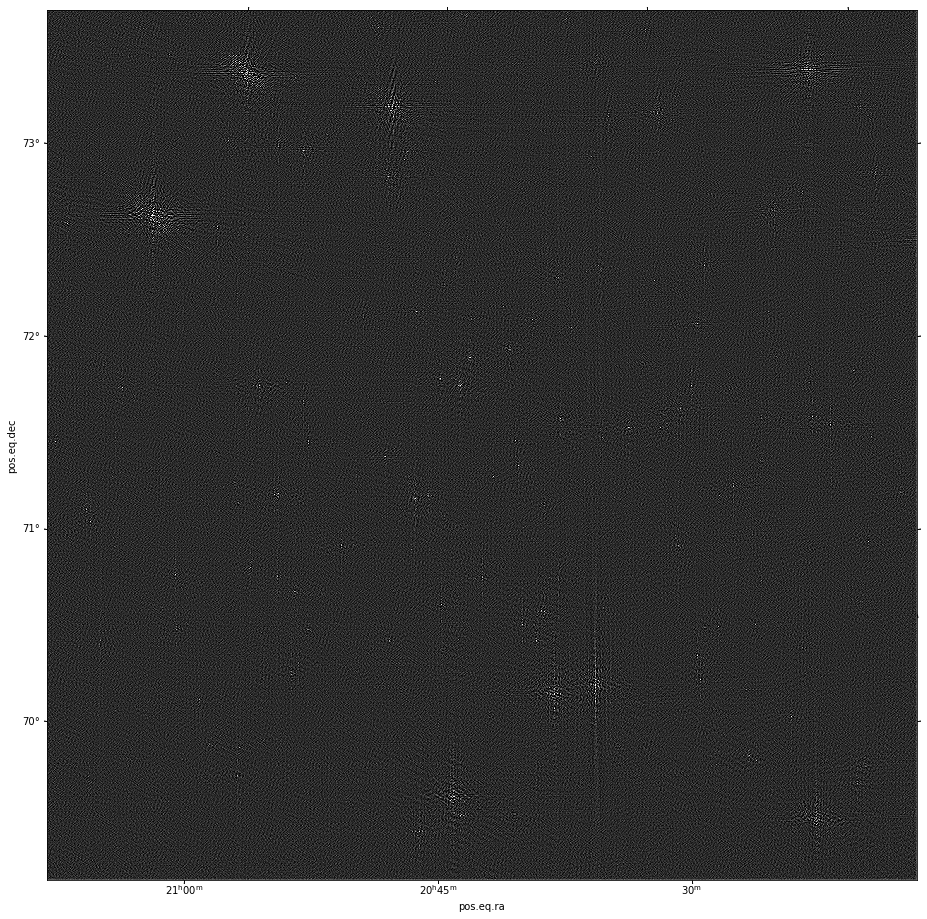

In [18]:
im.show()

In [19]:
im.add_arrows(co_match, drad, ddecd, 'white')

In [ ]:
im.add_arrows(co_match, drap, ddecp, 'red')

In [ ]:
im.fig